<a href="https://www.kaggle.com/code/ayushgharat17/housing-price-prediction-code-presentation?scriptVersionId=185000590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement: Predicting Housing Prices using Machine Learning

## Background:
Real estate valuation plays a crucial role in property transactions, investment decisions, and market analysis. Predicting housing prices accurately is essential for buyers, sellers, and real estate professionals to make informed choices. In this project, we aim to develop a machine learning model that predicts housing prices based on various attributes and features of residential properties.

## Objective:
The goal of this project is to create an accurate and reliable machine learning model that can predict housing prices based on property features and characteristics. This predictive model will assist buyers, sellers, and stakeholders in making data-driven decisions related to real estate investments and transactions.

## Dataset Description:
The dataset contains a wide range of features related to residential properties, including:

- `MSSubClass`: Building class of the property.
- `MSZoning`: General zoning classification.
- `LotFrontage`: Linear feet of street connected to the property.
- `LotArea`: Lot size in square feet.
- `Street`: Type of road access.
- `Alley`: Type of alley access.
- `LotShape`: General shape of the property.
- `LandContour`: Flatness of the property.
- `Utilities`: Type of utilities available.
- `LotConfig`: Lot configuration.
- (And [many more...](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data))

The target variable to predict is:
- `SalePrice`: The property's sale price in dollars.

## Approach:
1. **Data Cleaning and Preprocessing:**
   - Handle missing values, outliers, and data inconsistencies.
   - Encode categorical variables using techniques such as one-hot encoding or label encoding.
   - Perform feature scaling or normalization as necessary.

2. **Feature Engineering and Selection:**
   - Explore relationships between features and the target variable (`SalePrice`) using correlation analysis, visualizations, and domain knowledge.
   - Create new features if they can enhance the model's predictive power.
   - Select relevant features based on their importance and contribution to the model's performance.

3. **Model Selection and Training:**
   - Evaluate regression algorithms such as Linear Regression.
   - Split the dataset into training and testing sets for model training and evaluation.

4. **Model Evaluation and Analysis:**
   - Evaluate the trained models using metrics like root mean squared error (RMSE), R-squared,etc.
   - Compare the performance of different models to identify the most suitable one for predicting housing prices.
   - Analyze feature importances and coefficients to understand the factors influencing property prices.

5. **Deployment and Reporting:**
   - Deploy the best-performing model into production for real-time predictions (if applicable).
   - Prepare a comprehensive report or presentation summarizing the project findings, model performance, insights gained, and recommendations for stakeholders.

## Success Criteria:
The success of this project will be measured based on the accuracy and reliability of the machine learning model in predicting housing prices (`SalePrice`). A successful model should demonstrate low prediction errors, generalizability to new data, and provide actionable insights into factors affecting property valuations in the real estate market.

## 1.Setup

In [1]:
# libraries and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# data
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/true-solutions/solution.csv
/kaggle/input/kaggle-json/kaggle.json


In [2]:
# creating the submission
submission = pd.DataFrame(test["Id"])

# dropping the column Id
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

## 2.Data Cleaning, Transformation & Understanding

In [3]:
# descriptive stats
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Dealing with Null values in different columns

In [4]:
# null columns
nul_cols = []
nul_counts = []
for col in train.columns:
    if train[col].isnull().sum() > 1:
        nul_cols.append(col)
        nul_counts.append(train[col].isnull().sum())

# Nulls dataframe
nul_df = pd.DataFrame({"Columns":nul_cols,"Counts":nul_counts})
nul_df["Null precent%"] = nul_df["Counts"]/len(train)
nul_df

,Columns,Counts,Null precent%
0,LotFrontage,259,0.177397
1,Alley,1369,0.937671
2,MasVnrType,872,0.597260
3,MasVnrArea,8,0.005479
4,BsmtQual,37,0.025342
5,BsmtCond,37,0.025342
6,BsmtExposure,38,0.026027
7,BsmtFinType1,37,0.025342
8,BsmtFinType2,38,0.026027
9,FireplaceQu,690,0.472603


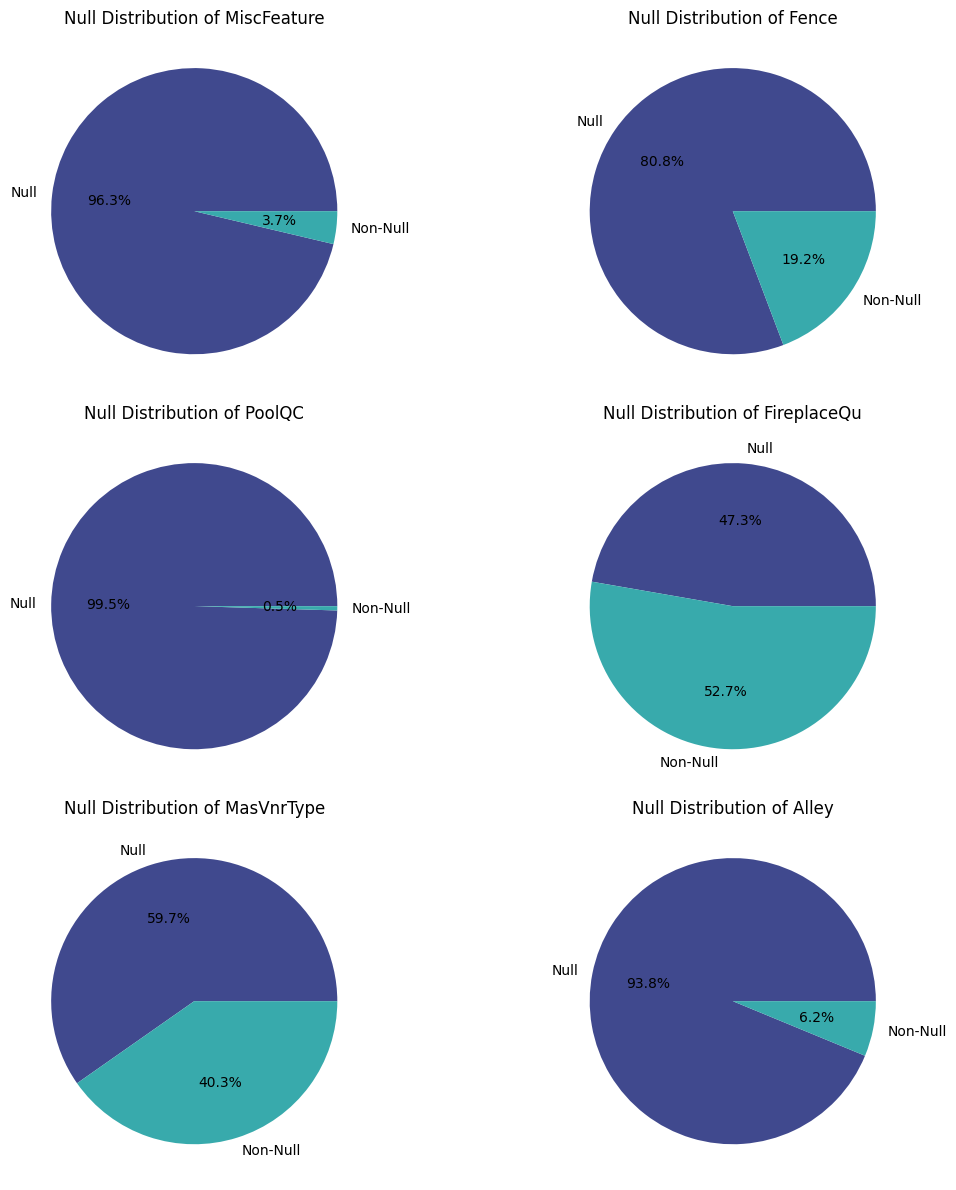

In [5]:
# unnecessary features
un_cols = ['MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType','Alley']

# 3x2 grid of pie charts
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten() # flattening the array
palette = sns.color_palette("mako",2)
# Create pie charts for each column
for i, col in enumerate(un_cols):
    null_percentage = train[col].isnull().mean() * 100
    axs[i].pie([null_percentage, 100-null_percentage], labels=['Null', 'Non-Null'], autopct='%1.1f%%',colors=palette)
    axs[i].set_title(f'Null Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

According to the data description text file on Kaggle, the NaN values are not missing values but the absence of the category in that column. We will replace the NaN with NA. In the numeric columns having NaN, through analysis, we figured out that in the column LotFrontage, NaN must be replaced by 0.  

In [6]:
# Columns with NaN values to be replaced with 'NA' or 0
replace_with_na = ["PoolQC", "MiscFeature", "FireplaceQu", "MasVnrType", "Fence", "Alley", "BsmtCond",
                   "BsmtExposure", "GarageType", "GarageFinish", "BsmtFinType1", "BsmtFinType2"]
replace_with_zero = ["LotFrontage", "MasVnrArea","GarageQual", "GarageCond","BsmtQual",]

# Replace NaN with 'NA' or 0 for train and test datasets
for col in replace_with_na:
    train[col].fillna("NA", inplace=True)
    test[col].fillna("NA", inplace=True)

for col in replace_with_zero:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

In [7]:
# train.drop(columns=un_cols,axis=1,inplace=True)
# test.drop(columns=un_cols,axis=1,inplace=True)

##### Outlier Detection

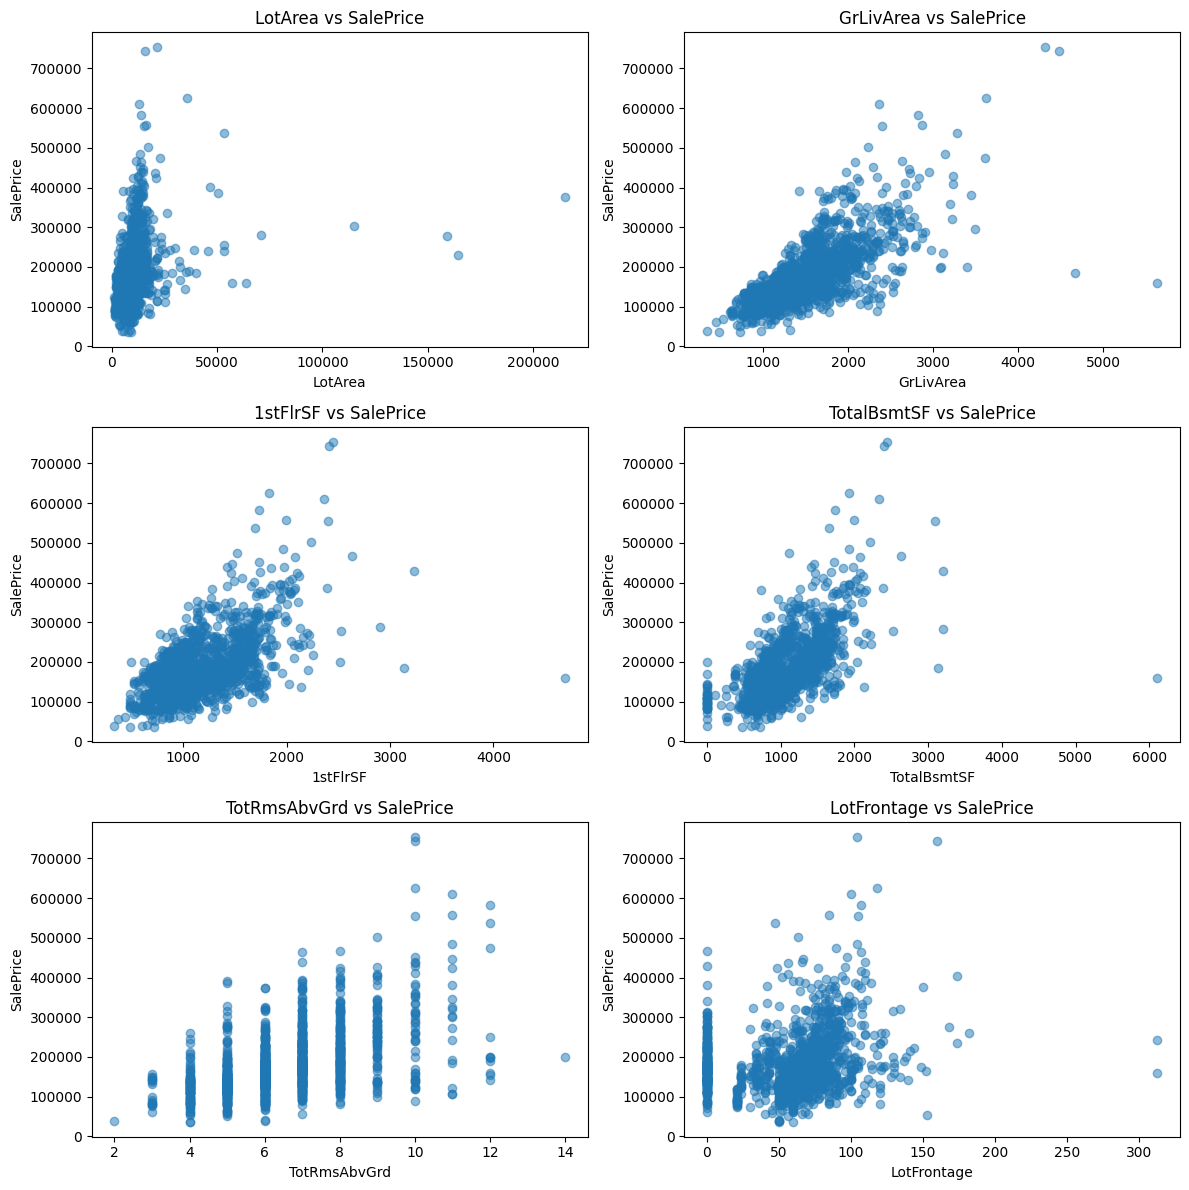

In [8]:
# creating the grid of plots
# List of independent variables
independent_vars = ['LotArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'LotFrontage']

# Create a 3x2 grid of scatter plots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the array for easier iteration

# Create scatter plots for each independent variable against 'SalePrice'
for i, var in enumerate(independent_vars):
    axs[i].scatter(train[var], train['SalePrice'], alpha=0.5)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_title(f'{var} vs SalePrice')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* LotArea

In [9]:
# suspicious data points in LotArea
train[train["LotArea"]>100000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,0.0,159000,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NA,NA,Shed,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,NA,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Normal,375000
335,190,RL,0.0,164660,Grvl,NA,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NA,NA,Shed,700,8,2008,WD,Normal,228950
706,20,RL,0.0,115149,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NA,NA,NA,0,6,2007,WD,Normal,302000


In [10]:
# check for the 99th or 99.5th percentile in the distribution of LotArea
train["LotArea"].quantile(0.995)

53422.28499999998

As we see, the majority of the data is clustered in the following range. Data points above 100000 `LotArea` seem to be highly unlikely.Based on the data analysis, it appears that the majority of the data is concentrated within a specific range. However, data points that exceed 100000 `LotArea` appear to be highly unlikely. This suggests that there may be outliers or anomalies present in the data set that should be examined further. A more detailed analysis and investigation may be required to fully understand the underlying factors contributing to this observation.

* GrLivArea

<Axes: >

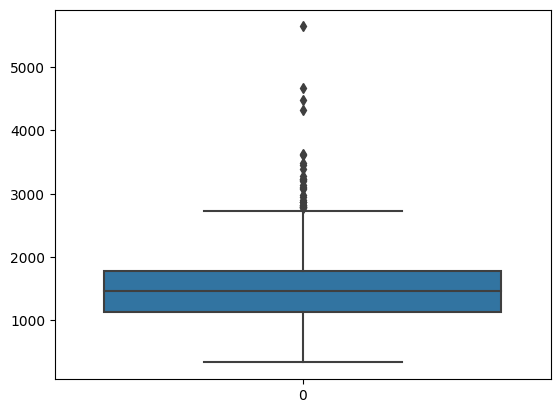

In [11]:
# box plot for GrLivArea
sns.boxplot(train["GrLivArea"])

In [12]:
# check for our estimate of data points above some threshold being outliers
train[train["GrLivArea"]>4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NA,NA,NA,0,10,2007,New,Partial,184750
691,60,RL,104.0,21535,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NA,NA,NA,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NA,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000


Based on our analysis of the provided visuals and data description, it appears that the indices 523 and 1298 could potentially be outliers. This conclusion is drawn from the observation that the feature representing the `SalePrice` may not accurately represent the true value for these particular indices. As a business analyst, it is important to identify such outliers in order to ensure the accuracy and reliability of any subsequent analyses or modeling efforts.

* 1stFlrSF<br>
In the scatterplot of `1stFlrSF` V/S `SalePrice`, there is only one data points having 1stFlrSF above 4000. We perform an analysis over that data point.

In [13]:
# analysis the points with 1stFlrSF above 4000
train[train["1stFlrSF"]>4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

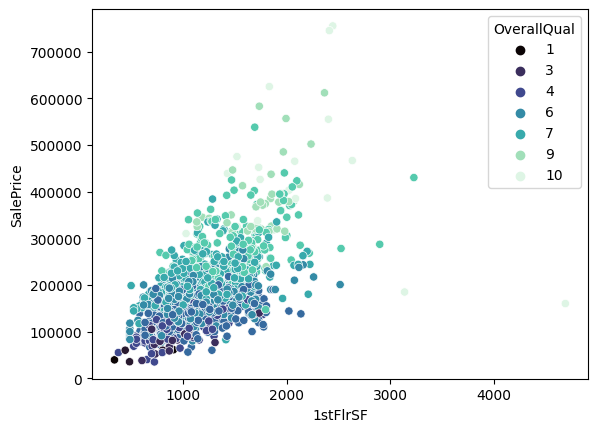

In [14]:
# analysis the 1stFlrSF V/S SalePrice with varying OverallQual
sns.scatterplot(data=train,x="1stFlrSF",y="SalePrice",hue="OverallQual",palette="mako")

Based on our analysis, it appears that the data point with a `1stFlrSF` above the usual range is quite anomalous and deviates significantly from the actual data distribution. As a business analyst, it is important to identify and address such outliers in order to ensure the integrity and accuracy of our data-driven insights.

* TotalBsmtSF

In [15]:
# Analysing for the data points with TotalBsmtSF above 5000
train[train["TotalBsmtSF"]>5000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000


Based on our analysis, this particular data point appears to be an outlier that falls far outside the range of the general distribution of data points. It is important to exclude this data point when conducting any further statistical analysis to ensure the accuracy and reliability of our results. As a business analyst, it is crucial to identify and address outliers to prevent misleading conclusions and make informed business decisions.

* TotRmsAbvGrd<br>
There is one data point with `TotRmsAbvGrd` equal to 14.

In [16]:
# rows with TotRmsAbvGrd == 14
train[train["TotRmsAbvGrd"]==14]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NA,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NA,NA,NaN,NA,0,0,0,0,N,0,110,0,0,0,0,NA,NA,NA,0,3,2007,WD,Abnorml,200000


In [17]:
# Analysing the value of the SalePrice of the all records with similar entries
train[(train["OverallQual"]==6) & (train["OverallCond"]==7)].groupby("YrSold")["SalePrice"].agg('median')

YrSold
2006    155000.0
2007    180450.0
2008    177000.0
2009    177500.0
2010    158000.0
Name: SalePrice, dtype: float64

It's noteworthy that the `SalePrice` of that particular data point is consistently deviating from its usual trend. This pattern is worth paying attention to, as it may indicate an underlying issue that needs to be addressed.

* LotFrontage<br>
There are two data points with `LotFrontage` above 300.

In [18]:
# rows with LotFrontage above 300
train[train["LotFrontage"]>300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NA,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,11,2008,WD,Normal,242000
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000


In [19]:
# SaleType-wise SalePrice
train.groupby('SaleType')["SalePrice"].agg('median')

SaleType
COD      139000.0
CWD      188750.0
Con      269600.0
ConLD    140000.0
ConLI    125000.0
ConLw    144000.0
New      247453.0
Oth      116050.0
WD       158000.0
Name: SalePrice, dtype: float64

In [20]:
# SaleCondition-wise SalePrice
train.groupby('SaleCondition')["SalePrice"].agg('median')

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

Based on our analysis and observations of their distribution, it appears that these particular data points do not conform to the typical pattern of the rest of the data set. As a business analyst, it is important to identify and address such outliers to ensure accurate and reliable results.

**Conclusions from the above plots:**

- `LotArea`: While most data points in the LotArea feature are clustered between 0 and 50,000, with a few between 50,000 and 100,000, it is difficult to definitively conclude that points above 100,000 are outliers based solely on this observation.
- `GrLivArea`: Although data points with GrLivArea greater than 4,000 are rare, and indices 523 and 1298 do not follow the usual trend, it is not sufficient to conclude that these points are outliers without further analysis.
- `1stFlrSF`: Data points with 1stFlrSF above 4,000 are uncommon and exhibit unfamiliar behavior, but this alone does not justify excluding them as outliers without additional investigation.
- `TotalBsmtSF`: Data points with TotalBsmtSF above 5,000 do not align well with the general distribution. However, it cannot be conclusively stated that these points are outliers without further validation.
- `TotRmsAbvGrd`: Although there is only one point with TotRmsAbvGrd equal to 14, which shows an unusual relationship with SalePrice compared to the rest of the data, this single observation does not provide enough evidence to classify it as an outlier.
- `LotFrontage`: A few points have LotFrontage above 300, which seems unfamiliar when considering other differentiating terms such as SaleType and SaleCondition. Nevertheless, these points cannot be conclusively labeled as outliers without a more comprehensive analysis.

For the above analysis through scatterplots, a detailed analysis was conducted for the outliers.

**Creating new columns from the existing ones:**<br>
In the following discussion/code, we are performing feature engineering by creating new columns out of the existing columns to create more meaningful insists in the prediction the data. This kind of feature engineering can be extremely useful in data analysis and machine learning tasks, as it allows you to extract more meaningful information from your data and improve the performance of your models.

**Understanding behind creating a new column out of the existing one:**
<br>
Creating a new column from the existing one came through data understanding. HalfBath can be confusing with FullBath, so we made a column named Bath, which is the sum of `FullBath` and 0.5 times `HalfBath` to signify the presence of half-bath as HalfBath.(`Disclaimer`: This understanding can be misleading because it can lead to loss of information. For example, by 4 Bath, we can't tell how many half bathrooms the house had.). The same logic we performed with `BsmtBath`.A similar idealogy we did for `TotalFlrSF`  and `BsmtFinSF` combines the total square feet area of the floor(or basement).

For the time series of the year, we calculate the age since the house was built, re-modeled, and Garage age as variables `AgeYrSold`, `AgeGarageYrBlt` and `AgeYearRemodAdd`, respectively.

In [21]:
# combining the data
train["Bath"] = train["FullBath"]+ 0.5*train["HalfBath"]
test["Bath"] = test["FullBath"]+ 0.5*test["HalfBath"]
train["BsmtBath"] = train["BsmtFullBath"]+ 0.5*train["BsmtHalfBath"]
test["BsmtBath"] = test["BsmtFullBath"]+ 0.5*test["BsmtHalfBath"]
train.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)
test.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

# combining the 1stFlrSF & 2ndFlrSF
train["TotalFlrSF"] = train["1stFlrSF"]+train["2ndFlrSF"]
test["TotalFlrSF"] = test["1stFlrSF"]+test["2ndFlrSF"]
train.drop(columns=['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
test.drop(columns=['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

# combining the BsmtFinSF1 & BsmtFinSF2
train["BsmtFinSF"] = train["BsmtFinSF1"]+train["BsmtFinSF2"]
test["BsmtFinSF"] = test["BsmtFinSF1"]+test["BsmtFinSF2"]
train.drop(columns=["BsmtFinSF1","BsmtFinSF2"],axis=1,inplace=True)
test.drop(columns=["BsmtFinSF1","BsmtFinSF2"],axis=1,inplace=True)

## Working with Year related columns
# columns with Year related data
yr_cols = [cols for cols in train.columns if ('Year' in cols)|('Yr' in cols)]

# Age of YrSold, GarageYrBuilt & YearRemodAdd
train['AgeYearRemodAdd'] = train['YrSold']-train['YearRemodAdd']
train['AgeGarageYrBlt'] = train['YrSold']-train['GarageYrBlt']
train['AgeYrSold'] = train['YrSold']-train['YearBuilt']
train.drop(columns=yr_cols,inplace=True)

# same transformations on test data
test['AgeYearRemodAdd'] = test['YrSold']-test['YearRemodAdd']
test['AgeGarageYrBlt'] = test['YrSold']-test['GarageYrBlt']
test['AgeYrSold'] = test['YrSold']-test['YearBuilt']
test.drop(columns=yr_cols,inplace=True)

**Discussion:**
<br>
The columns of AgeGarageYrBlt have 81 NaN values. The reason we didn't replace them before was the insensibility of the value. If we had replaced them before by zero, the outcome wouldn't have made sense. We'll do the replacement now for the implication of no garage, concluding zero years spent after building the garage.

In [22]:
# replacement for AgeGarageYrBlt
train["AgeGarageYrBlt"].replace(np.NaN,0,inplace=True)
test["AgeGarageYrBlt"].replace(np.NaN,0,inplace=True)

Text(0.5, 1.0, 'Distribution of Heating')

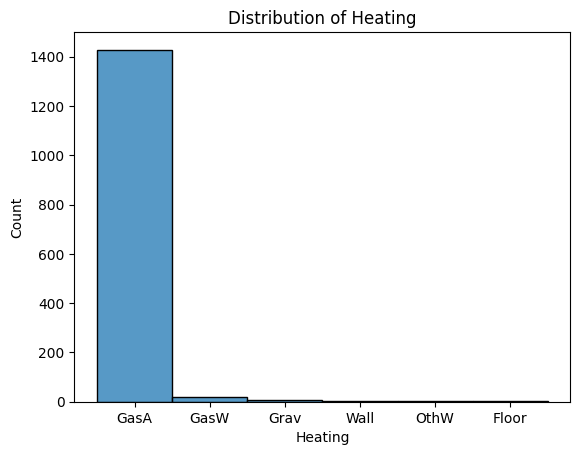

In [23]:
# distrbution of count of values for Heating
sns.histplot(train["Heating"])
plt.title("Distribution of Heating")

The categories OthW and Floor had very few instances as compared to the other categories. So, we took the decision to drop those categories. <br>
**Disclaimer:** 
In the case of diverse data other than the given train and test this can lead to overfitting.

In [24]:
# highly uncommon
rows2drop = train[(train["Heating"]=="OthW") | (train["Heating"]=="Floor")].index
train.drop(rows2drop,inplace=True)

In [25]:
# replacing the KitchenAbvGr==3.0 by 2.00
train["KitchenAbvGr"].replace(3.0,2.0,inplace=True)

Through analysis, we found out that having 3 Kitchens above the ground had a poor sale price. We careful analysed and found out that its sale price was similar to the houses with 2 kitches above the ground. For better understanding purposes, we replaced the value of 3 by 2. <br>**Disclaimer:** This is not the indication of that row being an outlier.

A similar scenario(the one with the dominance of one category); the AllPub has extremely frequency in comparsion to the NoSeWa. Even if we drop the NoSeWa row, the monotonicity of AllPub will seem unnecessary. For this model, from an experimental point of view, we are dropping the Utilities column.

In [26]:
train["Utilities"].value_counts()

Utilities
AllPub    1456
NoSeWa       1
Name: count, dtype: int64

In [27]:
# dropping Utilities because monotonicity
train.drop(columns=["Utilities"],axis=1,inplace=True)
test.drop(columns=["Utilities"],axis=1,inplace=True)

The correlation of MoSold with SalePrice: 0.04748641349449294


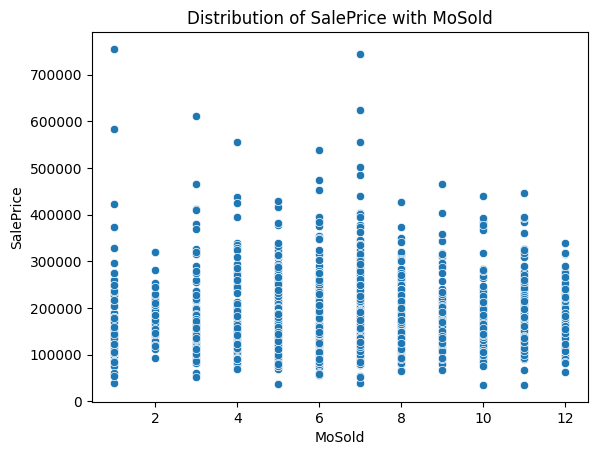

In [28]:
# MoSold
sns.scatterplot(data=train,x="MoSold",y="SalePrice")
plt.title("Distribution of SalePrice with MoSold")
print(f"The correlation of MoSold with SalePrice: {train.corr(numeric_only=True)['MoSold']['SalePrice']}")

Due to lack of the ability of the MoSold to describe a certain trend with SalePrice and similar, we took the decision to drop the MoSold column for now.

In [29]:
# Month Sold has very less significance towards the target variable
train.drop("MoSold",axis=1,inplace=True)
test.drop("MoSold",axis=1,inplace=True)

In [30]:
# # Replacement of NaN in the remaining columns with the mode
# # Replacement for the null values
test["MSZoning"].replace(np.NaN,train["MSZoning"].value_counts().index[0],inplace=True)
test["Exterior1st"].replace(np.NaN,train["Exterior1st"].value_counts().index[0],inplace=True)
test["Exterior2nd"].replace(np.NaN,train["Exterior2nd"].value_counts().index[0],inplace=True)
test["BsmtUnfSF"].replace(np.NaN,0,inplace=True)
test["TotalBsmtSF"].replace(np.NaN,0,inplace=True)
test["KitchenQual"].replace(np.NaN,train["KitchenQual"].value_counts().index[0],inplace=True)
test["Functional"].replace(np.NaN,train["Functional"].value_counts().index[0],inplace=True)
test["GarageCars"].replace(np.NaN,0,inplace=True)
test["GarageArea"].replace(np.NaN,0,inplace=True)
test["SaleType"].replace(np.NaN,train["SaleType"].value_counts().index[0],inplace=True)
#test["BsmtFullBath"].replace(np.NaN,0,inplace=True)
#test["BsmtFullBath"].replace(np.NaN,0,inplace=True)
test["BsmtBath"].replace(np.NaN,0,inplace=True)
#test["BsmtFinSF2"].replace(np.NaN,0,inplace=True)
test["BsmtFinSF"].replace(np.NaN,0,inplace=True)
# null values in the column Electrical
train["Electrical"].replace(np.NaN,train["Electrical"].value_counts().index[0],inplace=True)

In [31]:
# check for the null values
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
                  ..
TotalFlrSF         0
BsmtFinSF          0
AgeYearRemodAdd    0
AgeGarageYrBlt     0
AgeYrSold          0
Length: 73, dtype: int64

In [32]:
# column segregation
"""
Segregating the numeric and categorical columns
"""
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train.select_dtypes(exclude=['number']).columns.tolist()

num_cols = [cols for cols in numeric_cols if cols!="SalePrice"]

**Understanding the skewness in the data:**<br>
* Q.Why undestanding the skewness is necessary?<br>
Understanding the skewness in the data is crucial for building a reliable machine learning model. Skewness is a measure of the deviation of the distribution of a dataset from a normal distribution. If the dataset is significantly skewed, it can negatively impact the performance of the model. Skewed data can result in biased predictions, inaccurate estimates of statistical measures, and poor generalization of the model. Therefore, it is important to identify and correct skewness in the data before training the model. There are several techniques available to address skewness, such as log transformations, square root transformations, and box-cox transformations. By understanding the skewness in the data and applying appropriate transformations, we can improve the accuracy and reliability of the machine learning model.<br>

**Analysis of the Skewed Data:**<br>
Analyzing and transforming skewed data is vital for ensuring the accuracy, reliability, and interpretability of analyses and models, as well as meeting the assumptions of statistical techniques. It helps to uncover hidden patterns, reduce bias, and improve the overall quality of data-driven insights and decisions

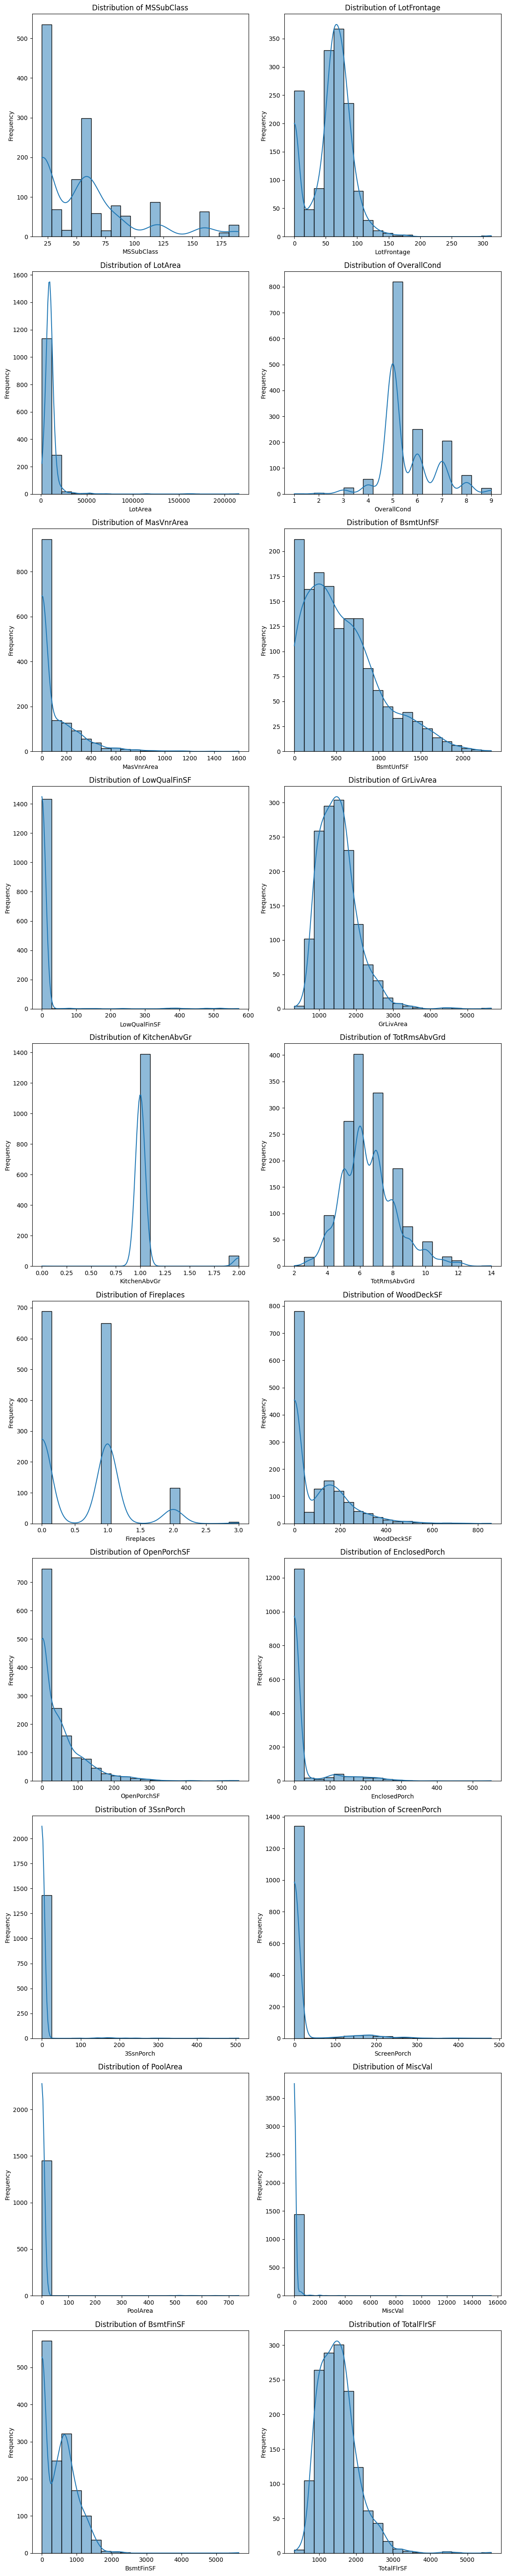

In [33]:
columns = ["MSSubClass","LotFrontage","LotArea","OverallCond","MasVnrArea","BsmtUnfSF","LowQualFinSF",
          "GrLivArea","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","WoodDeckSF","OpenPorchSF","EnclosedPorch",
          "3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF","TotalFlrSF"]

# Create subplots with two columns in one row
fig, axs = plt.subplots(10, 2, figsize=(12, 60))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot distplots for each column
for i, col in enumerate(columns):
    sns.histplot(data=train, x=col, kde=True, ax=axs[i], bins=20)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

We are using the Yeo-Johnson transformer which is default in the PowerTransformer form the sklearn.preprocessing
<br>

**Why Yeo-Johnson?**
<br>
The Yeo-Johnson transformation is preferred in many cases due to its ability to handle a wider range of data distributions, including zero and negative values, its flexibility in choosing the transformation parameter, its effectiveness in normalizing skewed data, and its robustness to outliers. These qualities make it a more reliable choice for data preprocessing and analysis tasks.

As the columns are positively skewed log-transformation or Yeo-Johnson approach can turn it to normal distribution

In [34]:
# Applying Yeo-Johnson techinque(as yeo-johnson works for negative values also)
transformer = PowerTransformer() 
train[num_cols] = transformer.fit_transform(train[num_cols])
test[num_cols] = transformer.transform(test[num_cols])

# the values of lambdas
lambda_df = pd.DataFrame({"Columns":num_cols,"Lambda(values)":transformer.lambdas_})
lambda_df

,Columns,Lambda(values)
0,MSSubClass,-0.230549
1,LotFrontage,0.740560
2,LotArea,0.031313
3,OverallQual,0.691676
4,OverallCond,0.239379
5,MasVnrArea,-0.242511
6,BsmtUnfSF,0.471457
7,TotalBsmtSF,0.738250
8,LowQualFinSF,-10.377454
9,GrLivArea,0.002005


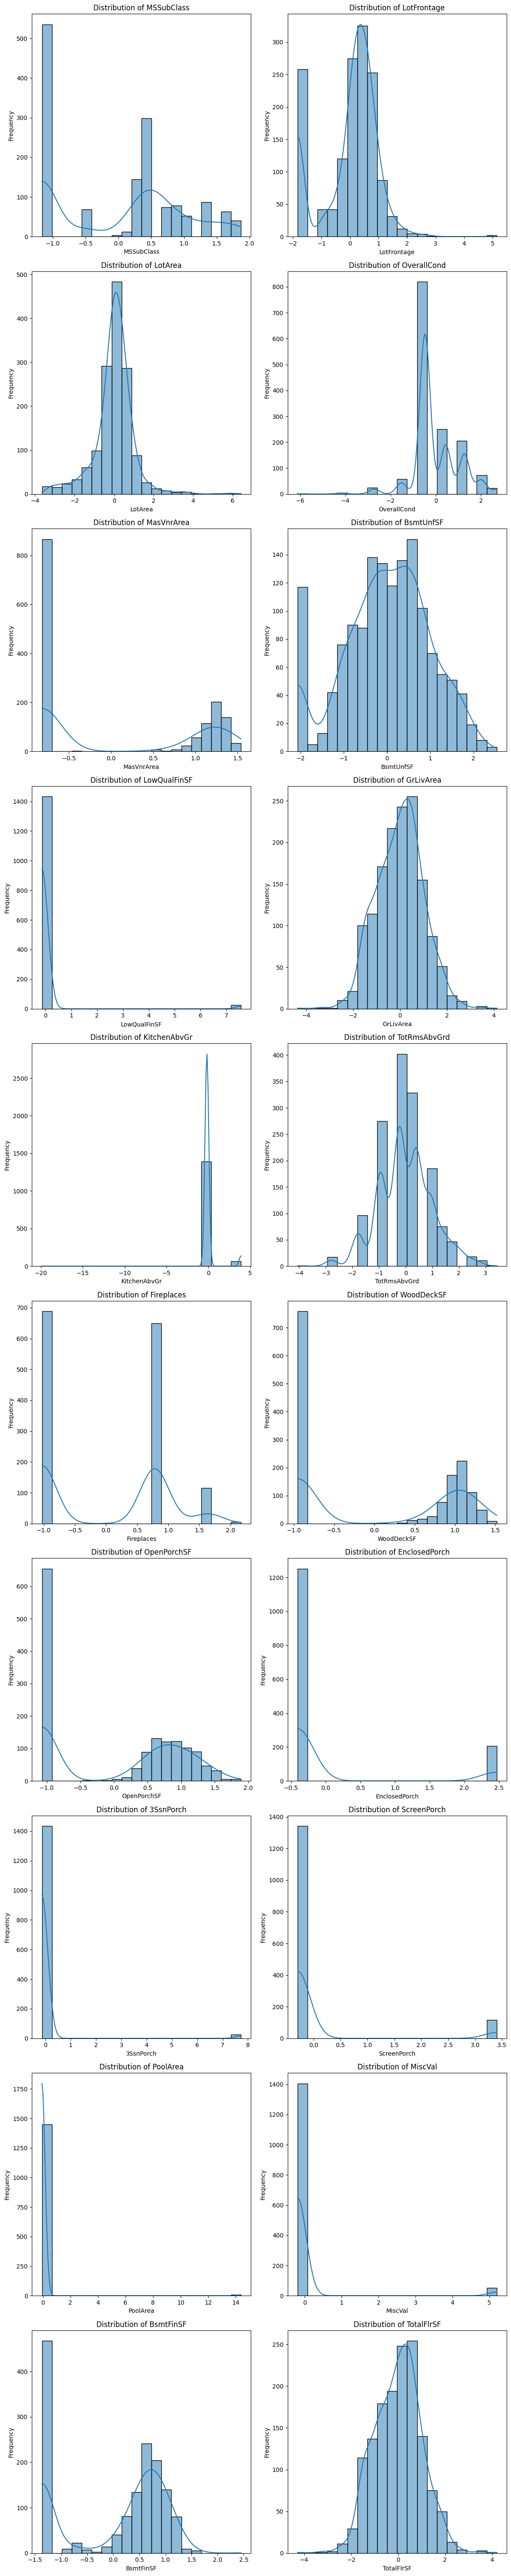

In [35]:
# plots after transformation
# Create subplots with two columns in one row
fig, axs = plt.subplots(10, 2, figsize=(12, 60))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot distplots for each column
for i, col in enumerate(columns):
    sns.histplot(data=train, x=col, kde=True, ax=axs[i], bins=20)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

**Understanding the correlation of the variables:**

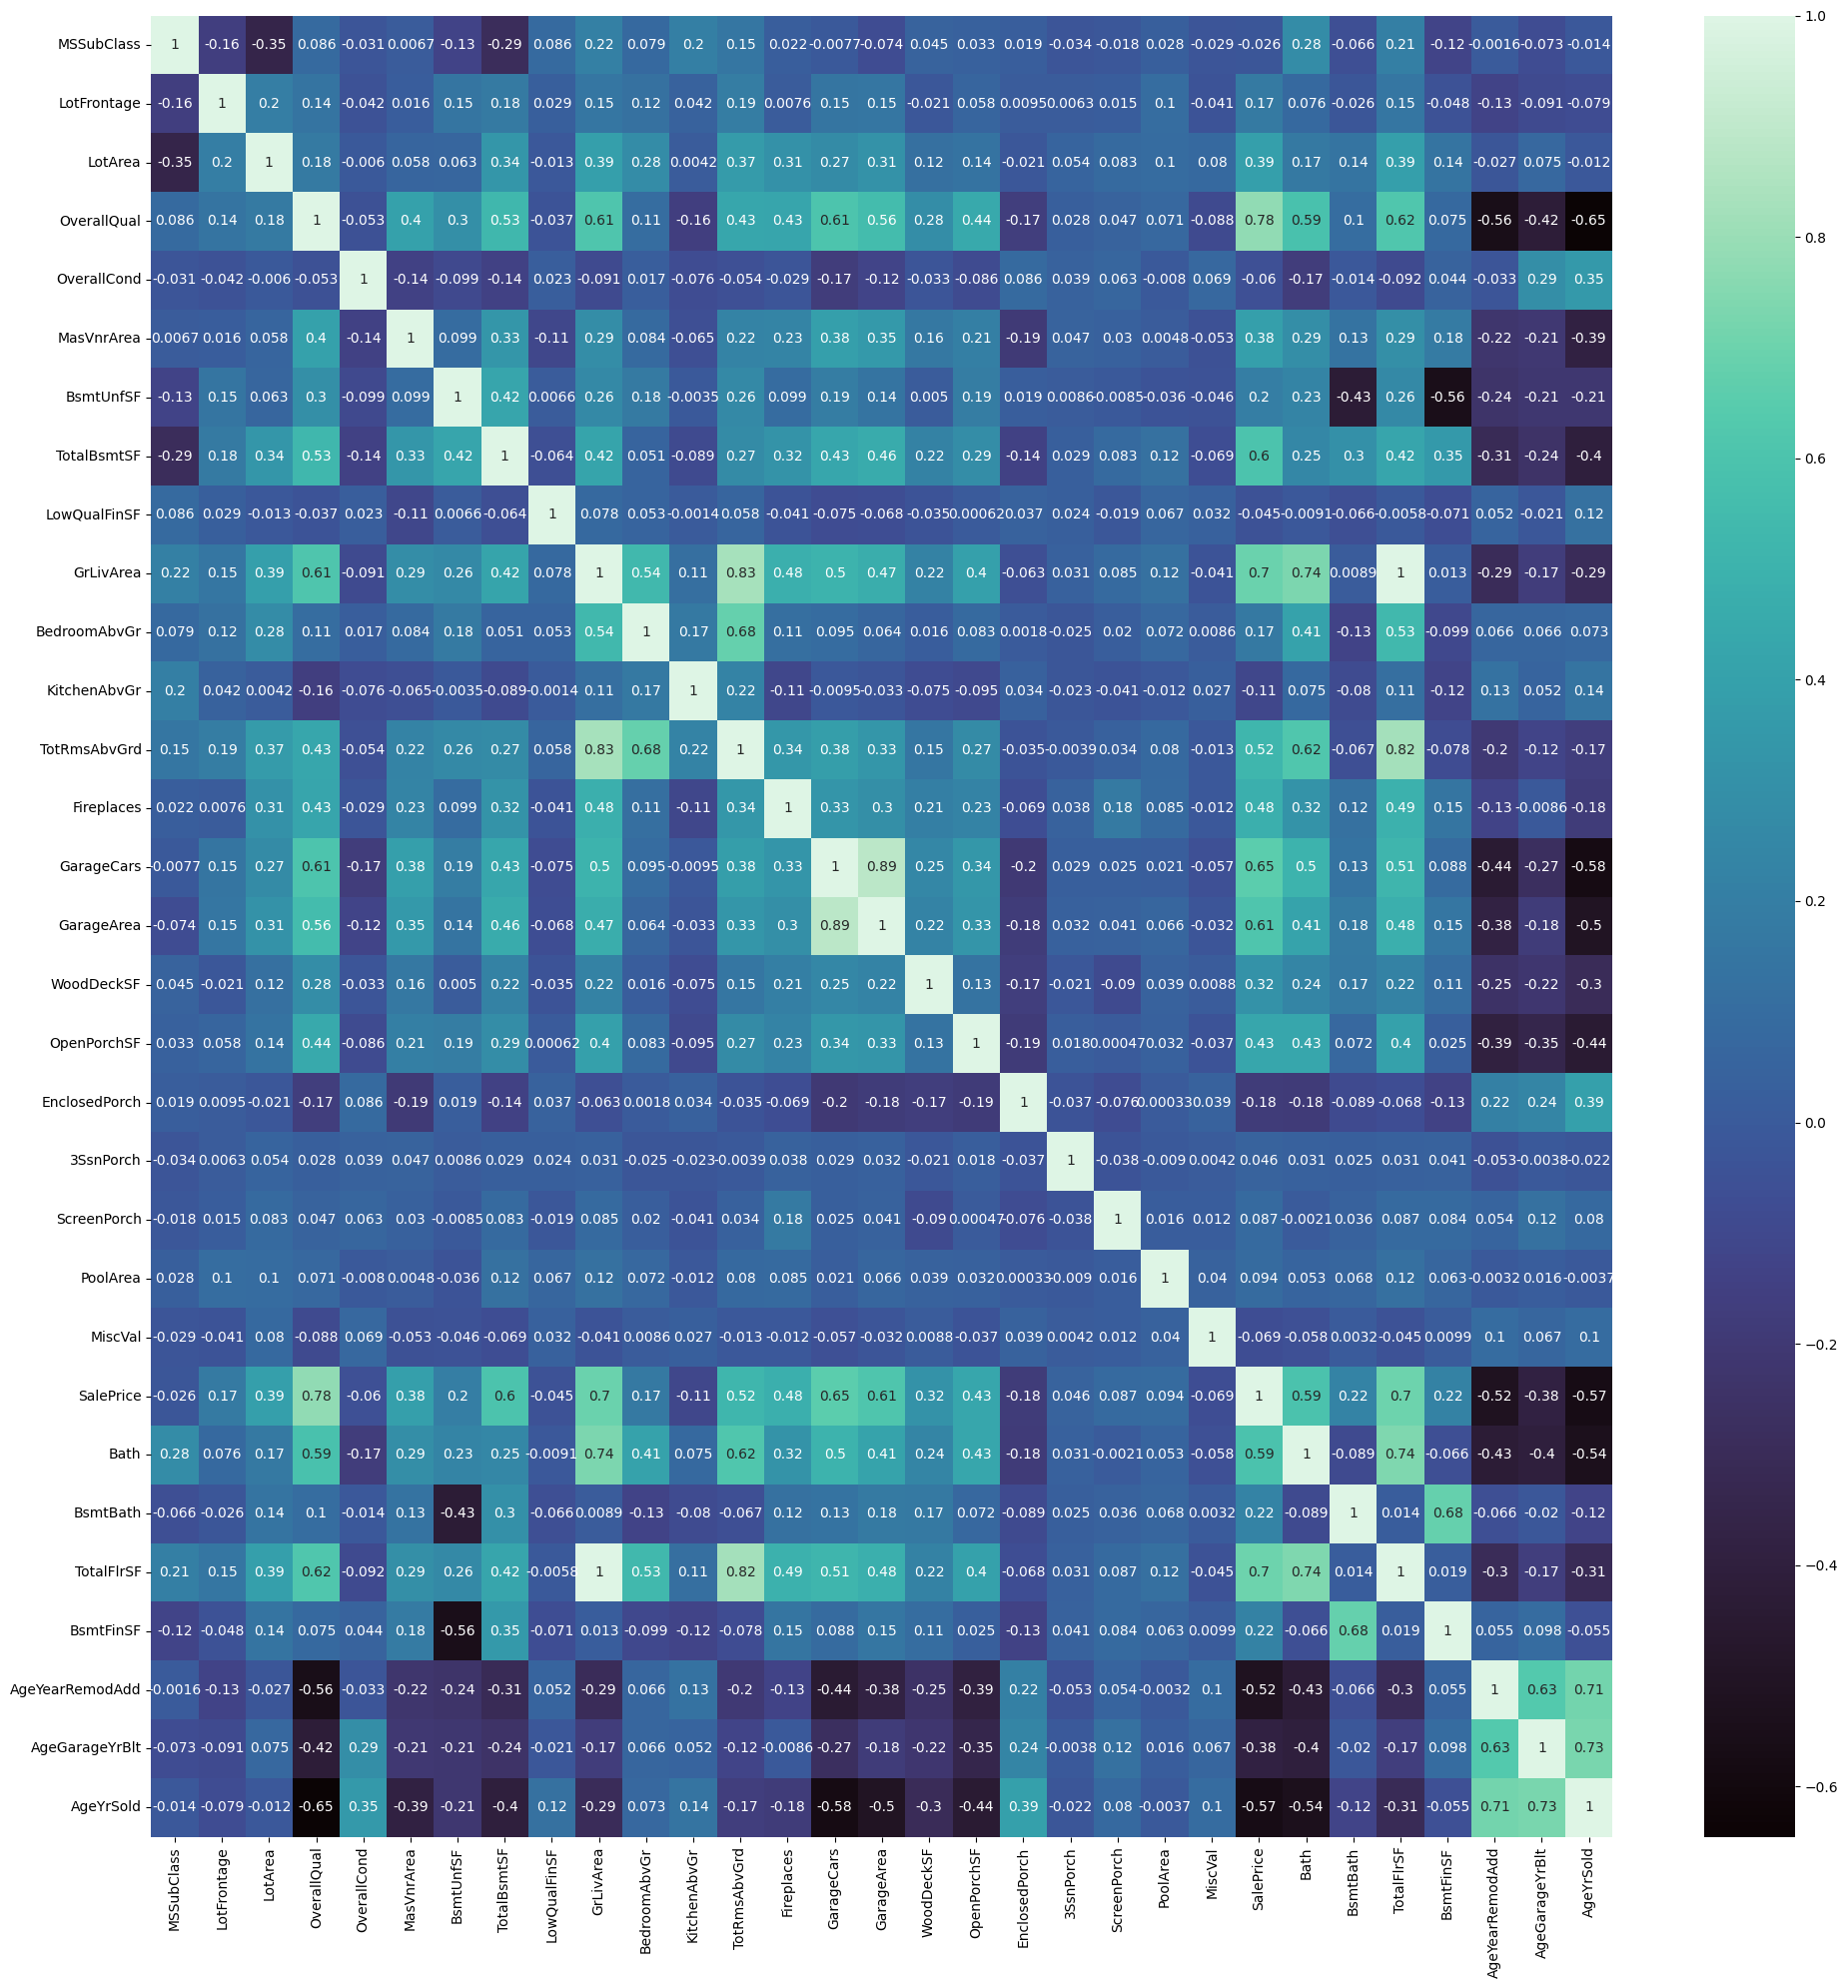

In [36]:
# creating a heatmap
plt.figure(figsize=(20,20))  # creating a bigger figure
sns.heatmap(train.corr(numeric_only=True),annot=True,fmt=".2g",cmap="mako",)
plt.tight_layout()
plt.show()

In [37]:
train.shape

(1457, 73)

**Multi-Collinearity:**
<br>
Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated with each other. It can cause issues in the analysis and interpretation of the model. Here are some key points about multicollinearity:

Correlation Among Predictors: Multicollinearity occurs when there are strong correlations between predictor variables. This means that one predictor can be linearly predicted from the others with a high degree of accuracy.

Impact on Model Coefficients: In the presence of multicollinearity, the coefficients of the correlated predictors can become unstable or have inflated standard errors. This makes it difficult to interpret the individual impact of each predictor on the target variable.

Reduced Predictive Power: Multicollinearity can reduce the predictive power of the model. When predictors are highly correlated, the model may struggle to distinguish the unique contribution of each predictor to the outcome variable.

Increased Variability: Multicollinearity can lead to increased variability in the estimates of the coefficients. This can make the model less reliable and can affect the accuracy of predictions.

Incorrect Variable Importance: Multicollinearity can lead to incorrect assessments of variable importance. Variables that are actually important may appear less significant, while variables that are less important may appear more significant due to their correlation with other predictors.

Overall, multicollinearity can complicate the interpretation and reliability of regression models. It's important to detect and address multicollinearity to ensure the accuracy and validity of the model's predictions and conclusions.

In [38]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# removing multicollinear features using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

def remove_multicollinear_features(df, threshold=10):
    while True:
        vif = calculate_vif(df)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif.loc[vif['VIF'] == max_vif, 'Feature'].values[0]
            df = df.drop(columns=[feature_to_remove])
        else:
            break
    return df

# dropping features that are highly multicollinear
numeric_features = X.select_dtypes(include=['number'])
numeric_features = remove_multicollinear_features(numeric_features)

# combining the remaining numeric features with the categorical features
categorical_features = X.select_dtypes(exclude=['number'])
X = pd.concat([numeric_features, categorical_features], axis=1)

# reconstruct the train dataset with selected features
train = pd.concat([X, y], axis=1)

# removing features with low correlation to the target variable
correlation_threshold = 0.05
corrmatrix = train.corr(numeric_only=True)
low_corr_features = corrmatrix.index[abs(corrmatrix["SalePrice"]) < correlation_threshold].tolist()
train = train.drop(columns=low_corr_features)

# selecting the same columns for the test data
selected_columns = [col for col in train.columns if col != "SalePrice"]
test = test[selected_columns]

# checking final dataset shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1457, 69)
Test shape: (1459, 68)


After thorough examination of the description text file and comprehensive exploration of categories within the real estate domain, we have firmly decided to treat the following features as ordinal data. This decision is rooted in the nuanced understanding of these features, their hierarchical nature, and the meaningful order they represent within the context of real estate analysis.

In [39]:
# through analysis we have found out a few ordinal columns
# categorizing the ordinal data
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual',
                'GarageCond', 'PavedDrive', 'LotShape', 'LandSlope', 'BldgType', 'HouseStyle', 
                'LotConfig']

# convert the values to integers
ordinal_col_dicts = {
    'ExterQual':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'ExterCond': {'TA': 3, 'Gd': 2, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'BsmtQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'BsmtCond': {'Fa': 4, 'Gd': 2, 'Po': 5, 'TA': 3,'Ex':1, 'NA':6},
    'BsmtExposure': {'No': 4, 'Av': 2, 'Gd': 1, 'Mn': 3,'NA':5},
    'BsmtFinType1': {'Unf': 6, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'NA':7},
    'BsmtFinType2': {'Unf': 6, 'Rec': 4, 'LwQ': 5, 'BLQ': 3, 'ALQ': 2, 'GLQ': 1, 'NA':7},
    'HeatingQC': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'CentralAir': {'Y': 1, 'N': 2},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'KitchenQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'Functional': {'Typ': 1, 'Min2': 3, 'Min1': 2, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8},
    'GarageFinish': {'Unf': 3, 'RFn': 2, 'Fin': 1, 'NA':4},
    'GarageQual': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Ex': 1, 'Po': 5},
    'GarageCond': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Po': 5, 'Ex': 1},
    'PavedDrive': {'Y': 1, 'N': 3, 'P': 2},
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Utilities': {'AllPub': 1, 'NoSeWa': 2},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'BldgType': {'1Fam': 1, 'TwnhsE': 4, 'Duplex': 3, 'Twnhs': 5, '2fmCon': 2},
    'HouseStyle': {'1Story': 1,  '2Story': 4, '1.5Fin': 2, 'SLvl': 8, 'SFoyer': 7, '1.5Unf': 3, '2.5Unf': 6, '2.5Fin': 5},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}
}

# transformation in the train and test data both
train.replace(ordinal_col_dicts,inplace=True)
test.replace(ordinal_col_dicts,inplace=True)

In [40]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,Bath,BsmtBath,TotalFlrSF,BsmtFinSF,AgeYearRemodAdd,AgeGarageYrBlt,AgeYrSold,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,0.293848,-0.142291,0.668155,-0.477416,1.228538,-0.889597,-0.407950,0.171079,-0.173921,0.947134,-1.028029,0.272177,0.381831,-0.952121,0.840646,-0.405793,-0.294113,-0.069481,-0.192382,1.149249,1.107421,0.537836,0.721378,-0.750315,-0.828377,-1.097684,RL,Pave,NA,1,Lvl,1,1,CollgCr,Norm,Norm,1,4,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,3,PConc,2,3,4,1,6,GasA,1,1,1,2,1,NA,Attchd,2,3,3,1,NA,NA,NA,WD,Normal,208500
1,0.659094,0.104360,-0.042255,2.009612,-0.819812,-0.436235,0.506518,0.171079,-0.173921,-0.234301,0.782780,0.272177,-0.007352,1.212504,-1.072104,-0.405793,-0.294113,-0.069481,-0.192382,0.426837,0.430205,-0.374464,0.937692,0.648100,0.447957,0.122347,RL,Pave,NA,1,Lvl,4,1,Veenker,Feedr,Norm,1,1,Gable,CompShg,MetalSd,MetalSd,NA,3,3,CBlock,2,3,1,2,6,GasA,1,1,1,3,1,TA,Attchd,2,3,3,1,NA,NA,NA,WD,Normal,181500
2,0.368489,0.412335,0.668155,-0.477416,1.191513,-0.049745,-0.257301,0.171079,-0.173921,-0.234301,0.782780,0.272177,0.640401,-0.952121,0.667078,-0.405793,-0.294113,-0.069481,-0.192382,1.149249,1.107421,0.669046,0.493894,-0.647154,-0.655367,-0.941325,RL,Pave,NA,2,Lvl,1,1,CollgCr,Norm,Norm,1,4,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,3,PConc,2,3,3,1,6,GasA,1,1,1,2,1,TA,Attchd,2,3,3,1,NA,NA,NA,WD,Normal,223500
3,0.167453,0.094247,0.668155,-0.477416,-0.819812,0.181800,-0.649410,0.171079,-0.173921,0.390621,0.782780,1.759172,0.784780,-0.952121,0.583084,2.467283,-0.294113,-0.069481,-0.192382,-1.215591,1.107421,0.550156,0.066337,0.803141,-0.579730,1.432015,RL,Pave,NA,2,Lvl,2,1,Crawfor,Norm,Norm,1,4,Gable,CompShg,Wd Sdng,Wd Shng,NA,3,3,BrkTil,3,2,4,2,6,GasA,2,1,1,2,1,Gd,Detchd,3,3,3,1,NA,NA,NA,WD,Abnorml,140000
4,0.753418,0.875578,1.351627,-0.477416,1.331466,0.075890,0.252146,1.383261,-0.173921,1.449194,0.782780,1.759172,1.583574,1.077684,0.990933,-0.405793,-0.294113,-0.069481,-0.192382,1.149249,1.107421,1.297514,0.674010,-0.469126,-0.579730,-0.871967,RL,Pave,NA,2,Lvl,4,1,NoRidge,Norm,Norm,1,4,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,3,PConc,2,3,2,1,6,GasA,1,1,1,2,1,TA,Attchd,2,3,3,1,NA,NA,NA,WD,Normal,250000


## 3.Model Building

In this model, we will utilize pipelining to reduce the lines of code and streamline the workflow. Pipelining is beneficial in programming and data analysis as it enables chaining multiple operations or steps into a single, streamlined workflow. By using pipelining, we can enhance code reusability, efficiency, automation, consistency, and scalability, making it a valuable tool in programming, data analysis, and machine learning workflows.

For the regression task, we will be using the following models within our pipeline:

- Linear Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression
- RandomForest Regression
- XGBoost Regression
- GradientBoosting Regression
- Support Vector Regression (SVR)

These models offer a diverse set of techniques for regression analysis, allowing us to explore different algorithms and find the one that best suits our data and problem domain. Through pipelining, we can efficiently apply preprocessing steps, model training, hyperparameter tuning, and evaluation across these various regression models, leading to a comprehensive and robust analysis.

In [41]:
# function to calculate RMSE
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Selecting the data (assuming 'train' DataFrame is defined)
X = train.drop(columns=['SalePrice'])
y = np.log1p(train['SalePrice'])  # to normalize the skewness

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# preprocessing on numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.select_dtypes(include=['number']).columns),
        ('cat', categorical_transformer, X_train.select_dtypes(exclude=['number']).columns)
    ])

# pipelining the model and preprocessor for different algorithms
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso())
])

elasticnet_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor())
])

gradboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', SVR())
])


# Defining hyperparameters for tuning
param_grid = [
    {},  # Linear Regression
    {'model__alpha': [0.1, 1, 10]},  # Ridge Regression
    {'model__alpha': [0.1, 1, 10]},  # Lasso Regression
    {'model__alpha': [0.1, 1, 10], 'model__l1_ratio': [0.25, 0.5, 0.75]},  # ElasticNet Regression
    {'model__n_estimators': [100, 200, 300], 'model__max_depth': [3, 5, 7, 10]},  # RandomForest Regression
    {'model__learning_rate': [0.01, 0.1, 0.5], 'model__max_depth': [3, 5, 7, 10]},  # XGBoost Regression
    {'model__n_estimators': [100, 200, 300], 'model__max_depth': [3, 5, 7, 10]},  # GradientBoosting Regression
    {'model__C': [0.1, 1, 10], 'model__epsilon': [0.01, 0.1, 1], 'model__kernel': ['linear', 'rbf']},  # SVR
]

pipelines = [linear_pipeline, ridge_pipeline, lasso_pipeline, elasticnet_pipeline,
             rf_pipeline, xgb_pipeline, gradboost_pipeline, svr_pipeline]

# Hyperparameter tuning and model fitting
best_models = []
for pipeline, params in zip(pipelines, param_grid):
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

# Evaluating best models and printing RMSE scores
RMSE_scores = []
for model in best_models:
    y_pred = model.predict(X_test)
    rmse_scores = rmse_score(y_test, y_pred)
    RMSE_scores.append(rmse_scores)

# Printing RMSE scores for each model
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression',
               'RandomForest Regression', 'XGBoost Regression', 'GradientBoosting Regression', 'SVR']

for name, rmse in zip(model_names, RMSE_scores):
    print(f"{name}: RMSE = {rmse}")

Linear Regression: RMSE = 0.17619649427960865
Ridge Regression: RMSE = 0.15749239804041582
Lasso Regression: RMSE = 0.2030274259264403
ElasticNet Regression: RMSE = 0.1593632328865957
RandomForest Regression: RMSE = 0.1402682540412911
XGBoost Regression: RMSE = 0.1353354425800106
GradientBoosting Regression: RMSE = 0.13356124328707414
SVR: RMSE = 0.16785211950104434


In [42]:
# index of the minimum rmse score
min_element = min(RMSE_scores)
min_idx = RMSE_scores.index(min_element)

In [43]:
# best model
model = best_models[min_idx]
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorch...
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Neighborhood',
       'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'FireplaceQu',
       'GarageType', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor(n_estimators=300))])

**Evaluation:**
<br>
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
<br>
RMSE = $\sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(y_i) - \log(\hat{y}_i))^2}$

In [44]:
# score
def rmse_score(y_true,y_pred):
    series = (np.log(y_true)-np.log(y_pred))**2
    mse = series.mean()
    return np.sqrt(mse)

In [45]:
y_pred = model.predict(test)

In [46]:
# submission
submission["SalePrice"] = np.expm1(y_pred)

In [47]:
submission.head()

,Id,SalePrice
0,1461,122595.273710
1,1462,162078.034987
2,1463,184462.136772
3,1464,188870.245087
4,1465,190072.395500


## 4.Conclusions and Results:

In conclusion, predicting the sale price of a house is a complex task that requires a comprehensive approach. The linear regression model is a powerful tool that can provide valuable insights into the factors that impact the sale price of a house. However, to build an accurate and reliable model, it is essential to perform feature engineering, data understanding, statistical tests, data visualizations, and accurate preprocessing steps. These steps can help to identify the relevant variables, address missing data, outliers, and skewed data, and improve the model's ability to predict the sale price. By applying these techniques, we can create a robust and efficient machine learning workflow that can provide accurate predictions and valuable insights into the housing market.

<Figure size 2200x2200 with 0 Axes>

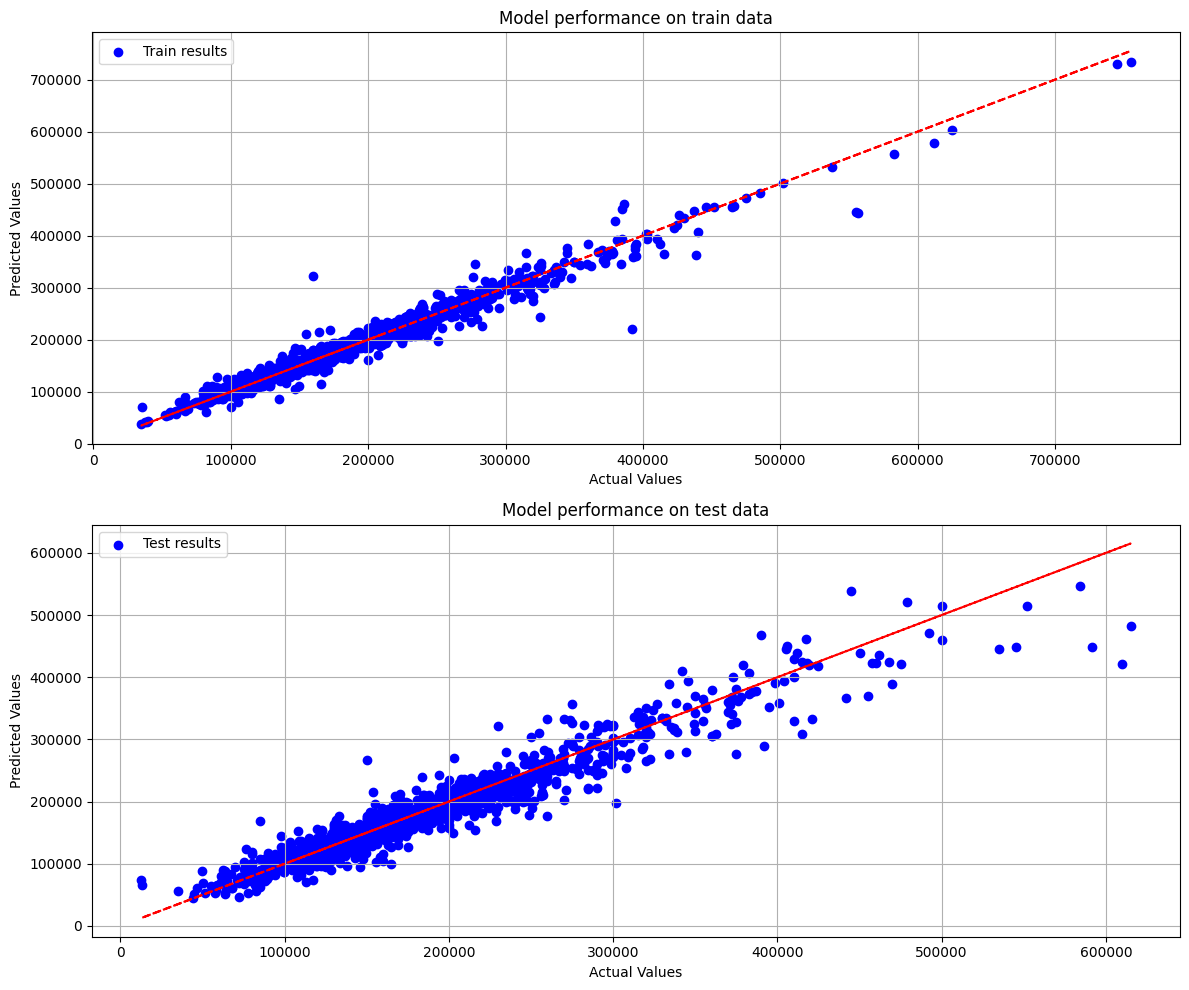

In [48]:
## Results of the model
# prediction on the train data
train_results = pd.DataFrame({"Actual":np.expm1(y),"Predicted":np.expm1(model.predict(X))})

# prediction on the test data
solution = pd.read_csv("/kaggle/input/true-solutions/solution.csv")
test_results = pd.DataFrame({"Actual":solution["SalePrice"],"Predicted":submission["SalePrice"]})

# Create subplots
plt.figure(figsize=(22,22))
fig, axs = plt.subplots(2,1, figsize=(12,10))

# plot for train_results
axs[0].scatter(train_results["Actual"],train_results["Predicted"],color='blue',label='Train results')
axs[0].plot(train_results["Actual"],train_results['Actual'],color='red',linestyle='--')  # Plot y=x line for reference
axs[0].set_title('Model performance on train data')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].legend()
axs[0].grid(True)

# Plot for DataFrame 2
axs[1].scatter(test_results['Actual'],test_results['Predicted'],color='blue',label='Test results')
axs[1].plot(test_results['Actual'],test_results['Actual'], color='red', linestyle='--')  # Plot y=x line for reference
axs[1].set_title('Model performance on test data')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
submission.to_csv("FINALSUBMISSION.csv",index=False)

Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques